In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key1

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-63.85202769868157 166.55302081626718
9.609041357920972 -179.63702782270508
-8.028370286961675 150.34288174795222
-30.273972466799712 -140.6478637143207
50.67331053822579 -62.96598808697627
-57.036763937806406 -124.95677076888866
-37.23039253213 0.33960984962089924
87.19334624292361 178.342903300104
60.4754808127351 -4.397826499263431
45.92176678744579 88.71935882613957
74.17374485205585 -90.79826755416697
76.32827439423232 110.239839117943
18.018088886382785 127.58068930675734
10.794392659303526 53.46536202434629
-59.466076674530555 -157.91385247899478
13.840188834619866 -167.08344363108114
-17.82239619924856 -143.6615274461195
47.22181687768014 23.82668946675315
-20.3120454727987 162.07640164977352
15.578798006870585 -61.76712479584634
35.15182382499583 -25.504130658398594
27.855999181901126 -24.584695154329154
36.456724636482065 -86.64914892910156
-88.72972363475776 4.323047864343579
13.276865903281276 -33.86060684224134
0.8616155331140192 0.9195022058615336
-74.50227138886484 79.20

88.72032718367953 -33.579260869727534
65.39829586210581 -38.630076211368305
-17.411759264265214 59.186983947472186
27.262539630193032 51.693117276347806
71.10472535758618 -175.14477744138344
-32.97452624308992 -97.78880077332887
70.21127860531183 38.287700456608235
-78.71020114734196 -22.26302023908042
63.00400240201034 -74.18542525627615
83.35180666792124 -134.77601078949382
8.741844292044192 -9.946891523975381
75.69138434719065 107.54337261286469
-2.5491342540939996 154.6880176672176
-18.66436359557234 153.25668755362227
-86.84323419882611 116.8349628566844
25.2129001005364 50.413928895562805
71.06403751202535 42.40141745750921
31.146366303097366 73.72152345441253
16.343935203260884 -174.11427375968188
-44.302687738625714 -73.93403196168912
63.67231464402312 -94.53010603285624
-64.03975460289736 -33.699660625760885
10.681283153021823 108.29998132997792
6.871877878807624 74.8101739782054
74.60921597255026 -82.91811022130094
-87.67219642597682 -101.21808970071184
-23.51711542542408 -12

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
#set common variable to match class text.
weather_api_key = weather_api_key1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | kandrian
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | havre-saint-pierre
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | stromness
Processing Record 9 of Set 1 | altay
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | pandan
Processing Record 13 of Set 1 | bargal
City not found. Skipping...
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | catcau
City not found. Skipping...
Processing Record 18 of Set 1 | poum
Processing Record 19 of Set 1 | coulihaut
City not found. Skipping...
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | los llanos de aridane
Processing Recor

Processing Record 36 of Set 4 | alenquer
Processing Record 37 of Set 4 | mozarlandia
City not found. Skipping...
Processing Record 38 of Set 4 | college
Processing Record 39 of Set 4 | elizabeth city
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | phalodi
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | mishelevka
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | klyuchi
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | itirapina
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | maceio
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | marshfield
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | natal
Processing Record 8 of Set 5 | pacif

Processing Record 23 of Set 8 | santa rosa
Processing Record 24 of Set 8 | qaqortoq
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | saint-philippe
Processing Record 27 of Set 8 | mayo
Processing Record 28 of Set 8 | oxapampa
Processing Record 29 of Set 8 | balimo
City not found. Skipping...
Processing Record 30 of Set 8 | dwarka
Processing Record 31 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 32 of Set 8 | fray bentos
Processing Record 33 of Set 8 | vestmannaeyjar
Processing Record 34 of Set 8 | manokwari
Processing Record 35 of Set 8 | verkhnyaya inta
Processing Record 36 of Set 8 | socorro
Processing Record 37 of Set 8 | high prairie
Processing Record 38 of Set 8 | ribeira grande
Processing Record 39 of Set 8 | canala
Processing Record 40 of Set 8 | salalah
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | ewa beach
Processing Record

Processing Record 12 of Set 12 | laguna
Processing Record 13 of Set 12 | abu samrah
Processing Record 14 of Set 12 | maxixe
Processing Record 15 of Set 12 | pouembout
Processing Record 16 of Set 12 | killybegs
Processing Record 17 of Set 12 | kjollefjord
Processing Record 18 of Set 12 | palauig
Processing Record 19 of Set 12 | haines junction
Processing Record 20 of Set 12 | barra
Processing Record 21 of Set 12 | odweyne
Processing Record 22 of Set 12 | agirish
Processing Record 23 of Set 12 | kolyshley
Processing Record 24 of Set 12 | solnechnyy
Processing Record 25 of Set 12 | san isidro
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | namtsy
Processing Record 28 of Set 12 | tevaitoa
Processing Record 29 of Set 12 | waipawa
Processing Record 30 of Set 12 | zaysan
Processing Record 31 of Set 12 | tibiao
Processing Record 32 of Set 12 | tambacounda
Processing Record 33 of Set 12 | nizhniy tsasuchey
Processing Record 34 of Set 12 | kutum
Processing Record 35 of Set

In [2]:
len(city_data)

NameError: name 'city_data' is not defined

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,91,NZ,2023-03-24 18:31:20,89,-46.6000,168.3333,57.79,16.28
1,Kandrian,100,PG,2023-03-24 18:31:21,85,-6.2167,149.5500,77.52,8.88
2,Rikitea,100,PF,2023-03-24 18:31:22,69,-23.1203,-134.9692,78.08,10.45
3,Havre-Saint-Pierre,100,CA,2023-03-24 18:31:22,80,50.2334,-63.5986,30.56,16.11
4,Saldanha,24,ZA,2023-03-24 18:31:23,88,-33.0117,17.9442,64.45,12.21
5,Leningradskiy,91,RU,2023-03-24 18:31:24,90,69.3833,178.4167,-15.50,6.58
6,Stromness,100,GB,2023-03-24 18:31:24,85,58.9650,-3.2960,42.76,15.99
7,Altay,0,CN,2023-03-24 18:31:25,65,47.8667,88.1167,23.85,7.83
8,Thompson,20,CA,2023-03-24 18:31:26,57,55.7435,-97.8558,17.76,14.97
9,Saskylakh,100,RU,2023-03-24 18:31:26,86,71.9167,114.0833,13.50,13.00


In [12]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2023-03-24 18:31:20,-46.6000,168.3333,57.79,89,91,16.28
1,Kandrian,PG,2023-03-24 18:31:21,-6.2167,149.5500,77.52,85,100,8.88
2,Rikitea,PF,2023-03-24 18:31:22,-23.1203,-134.9692,78.08,69,100,10.45
3,Havre-Saint-Pierre,CA,2023-03-24 18:31:22,50.2334,-63.5986,30.56,80,100,16.11
4,Saldanha,ZA,2023-03-24 18:31:23,-33.0117,17.9442,64.45,88,24,12.21
5,Leningradskiy,RU,2023-03-24 18:31:24,69.3833,178.4167,-15.50,90,91,6.58
6,Stromness,GB,2023-03-24 18:31:24,58.9650,-3.2960,42.76,85,100,15.99
7,Altay,CN,2023-03-24 18:31:25,47.8667,88.1167,23.85,65,0,7.83
8,Thompson,CA,2023-03-24 18:31:26,55.7435,-97.8558,17.76,57,20,14.97
9,Saskylakh,RU,2023-03-24 18:31:26,71.9167,114.0833,13.50,86,100,13.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

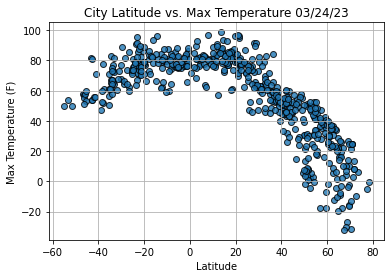

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

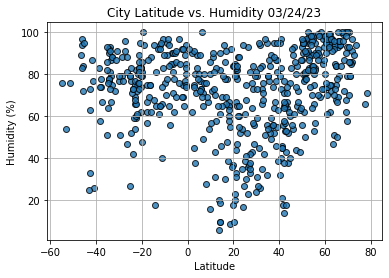

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

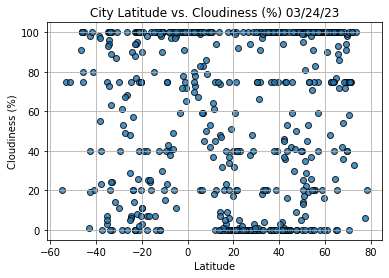

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

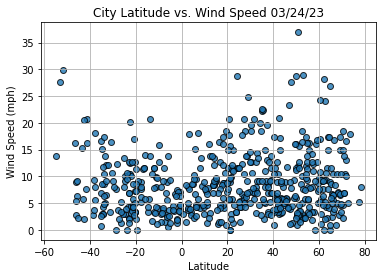

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


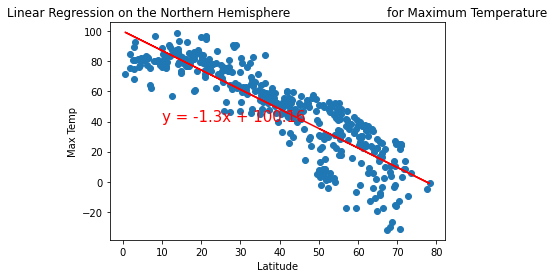

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


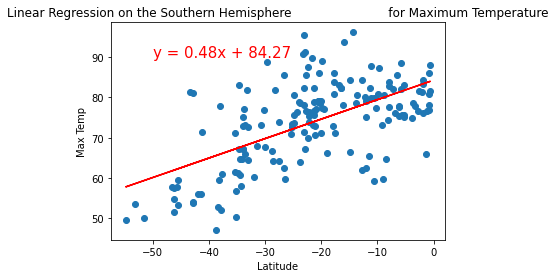

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


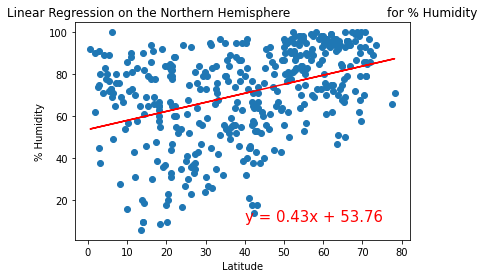

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


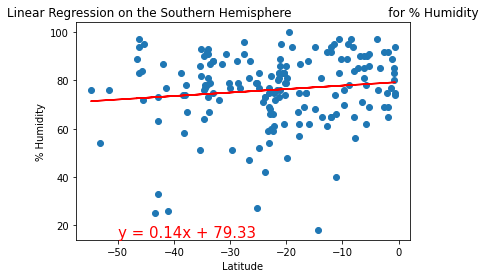

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


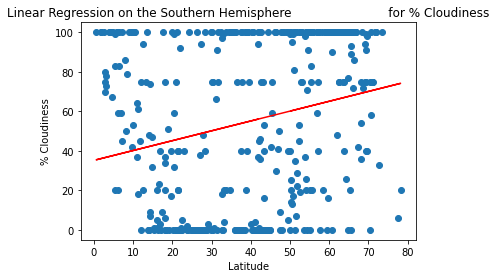

In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


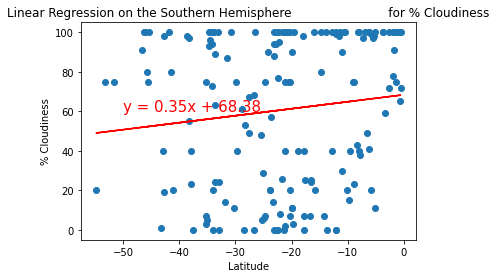

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


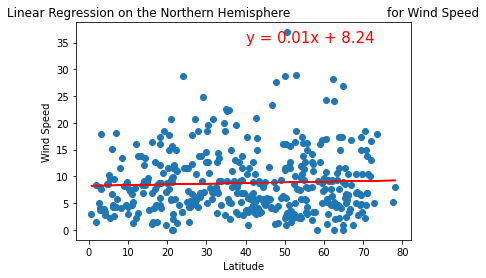

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


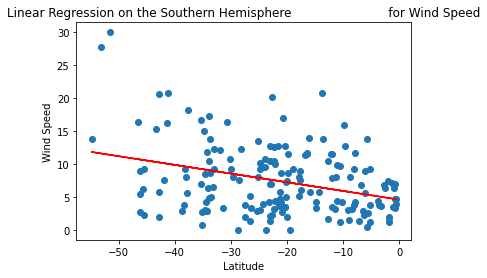

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
